<a href="https://colab.research.google.com/github/pkpk1717/FIFA-19-player-recommender-system/blob/master/FIFA_19_Player_similar_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile
import os
import shutil


    100% |████████████████████████████████| 993kB 21.2MB/s 


In [0]:
## GOOGLE DRIVE AUTHENTICATION
# -codepk03
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
## SEACHING FOR THE ZIP FILE AND THEN UNZIPPING IT IN COLAB AND DELETING UN-NECESSARY FILES

fid = drive.ListFile({'q':"title='fifa19.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('fifa19.zip')
with zipfile.ZipFile("fifa19.zip","r") as zip_ref:
    zip_ref.extractall("fifa_data/")
os.unlink('fifa19.zip')

In [0]:
data = pd.read_csv('fifa_data/data.csv')

In [17]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [18]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [19]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Initial insights

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


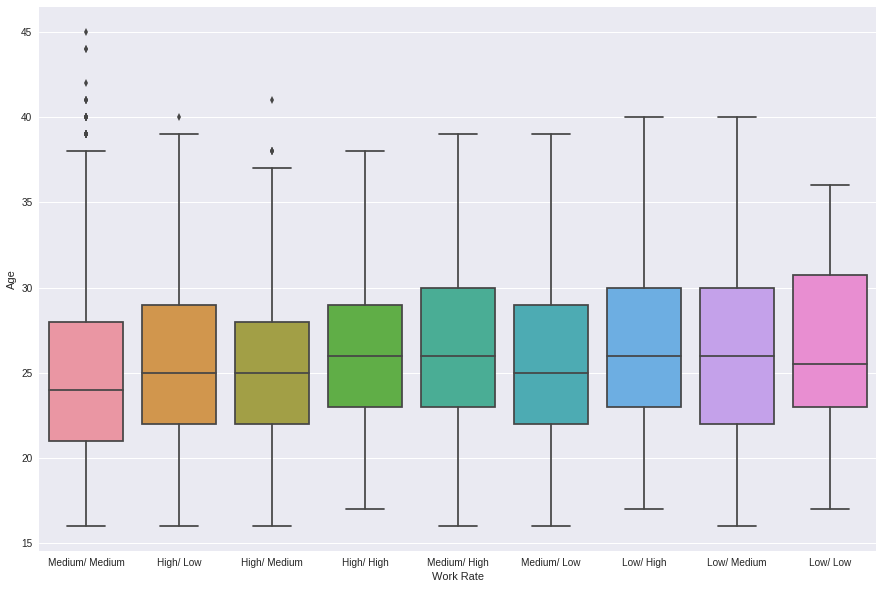

In [20]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "Work Rate", y = "Age", data = data)
plt.show()

In [21]:
data.isna().sum().sort_values(ascending=False)

Loaned From             16943
LWB                      2085
LM                       2085
CB                       2085
LCB                      2085
LB                       2085
RWB                      2085
RDM                      2085
CDM                      2085
LDM                      2085
RM                       2085
RCM                      2085
CM                       2085
LCM                      2085
RAM                      2085
RB                       2085
CAM                      2085
LAM                      2085
RW                       2085
RF                       2085
CF                       2085
LF                       2085
LW                       2085
RS                       2085
ST                       2085
LS                       2085
RCB                      2085
Release Clause           1564
Joined                   1553
Contract Valid Until      289
                        ...  
Positioning                48
FKAccuracy                 48
LongPassin

Above stats shows that there are a lot of empty values and this large number can not be filled, so dropping the most empty columns woud help.

In [0]:
data.drop('Loaned From',axis=1,inplace=True)

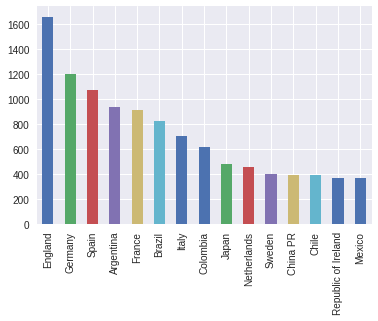

In [23]:
data['Nationality'].value_counts()[:15].plot(kind='bar')
plt.show()

Most number of players are from England, Germany and Spain as expected since 3 major leagues games are played in football there.

In [24]:
## lets drop unnecessary columns

cols_to_be_dropped = ['ID','Unnamed: 0','Weak Foot','Release Clause','Wage','Photo', 'Nationality', 'Flag',
                      'Club Logo', 'International Reputation',
                      'Work Rate', 'Body Type', 'Real Face','Jersey Number', 'Joined', 
                      'Contract Valid Until','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 
                      'RW','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 
                      'LDM','CDM', 'RDM', 'RWB', 'LB', 'LCB','CB', 'RCB', 'RB',]
data.drop(cols_to_be_dropped,axis=1,inplace=True)
data.head()

,Name,Age,Overall,Potential,Club,Value,Special,Preferred Foot,Skill Moves,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,94,94,FC Barcelona,€110.5M,2202,Left,4.0,RF,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,94,94,Juventus,€77M,2228,Right,5.0,ST,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,92,93,Paris Saint-Germain,€118.5M,2143,Right,5.0,LW,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,91,93,Manchester United,€72M,1471,Right,1.0,GK,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,91,92,Manchester City,€102M,2281,Right,4.0,RCM,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [0]:
data['Difference'] = data['Potential']-data['Overall']

def evolution(d):
    if d==0:
        return 'Stable'
    elif d>1 and d<=5:
        return 'Small'
    elif d>6 and d<=10:
        return 'Medium'
    elif d>10:
        return 'Large'
   
 
data['Evolution'] = data['Difference'].apply(evolution)
promising = data.loc[(data['Evolution']== 'Large') & (data['Potential']>85)].sort_values(by='Potential', ascending=False)[:10]

MOST PROMISING YOUTH PLAYER WHO HAVE A VERY HIGH POTENTIAL OF BECOME GREAT ARE :

In [27]:
cols  = ['Name','Club','Overall','Age','Potential','Value']
promising[cols]

,Name,Club,Overall,Age,Potential,Value
229,G. Donnarumma,Milan,82,19,93,€29M
1143,Vinícius Júnior,Real Madrid,77,17,92,€17.5M
734,A. Lafont,Fiorentina,78,19,90,€14M
1004,J. Sancho,Borussia Dortmund,77,18,89,€14.5M
1070,P. Cutrone,Milan,77,20,89,€16M
1149,R. Bentancur,Juventus,77,21,89,€15.5M
1172,N. Barella,Cagliari,77,21,89,€15.5M
7414,S. Tonali,Brescia,68,18,89,€1.8M
6102,Riqui Puig,FC Barcelona,69,18,89,€2.1M
1763,A. Meret,Napoli,75,21,89,€12M


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Player preferred Foot')

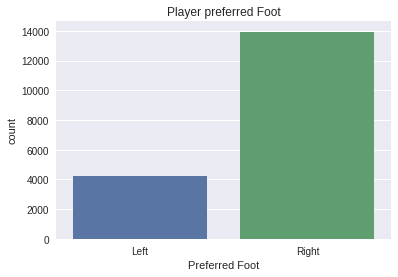

In [28]:
sns.countplot(data['Preferred Foot'])
plt.title('Player preferred Foot')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of players per position')

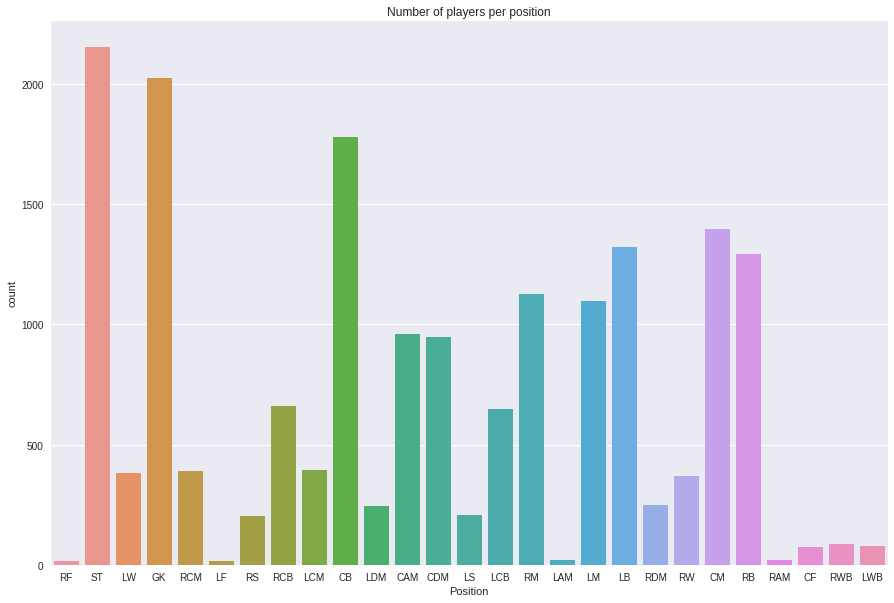

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data['Position'])
plt.title('Number of players per position')

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [31]:
# chooosing only import attritubes
data = pd.read_csv('fifa_data/data.csv')

attributes = data.iloc[:, 54:83]
attributes['Skill Moves'] = data['Skill Moves']
workrate = data['Work Rate'].str.get_dummies(sep='/ ')
attributes = pd.concat([attributes, workrate], axis=1)
df = attributes
attributes = attributes.dropna()
df['Name'] = data['Name']
df = df.dropna()
print(attributes.columns)

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Skill Moves', 'High', 'Low', 'Medium'],
      dtype='object')


In [32]:
attributes.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Skill Moves,High,Low,Medium
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,94.0,75.0,96.0,33.0,28.0,26.0,4.0,0,0,1
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,82.0,85.0,95.0,28.0,31.0,23.0,5.0,1,1,0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,87.0,81.0,94.0,27.0,24.0,33.0,5.0,1,0,1
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,40.0,68.0,15.0,21.0,13.0,1.0,0,0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,94.0,79.0,88.0,68.0,58.0,51.0,4.0,1,0,0


In [33]:
scaled = StandardScaler()
X = scaled.fit_transform(attributes)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
recommendations = NearestNeighbors(n_neighbors=6,algorithm='ball_tree')
recommendations.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

In [0]:
player_index = recommendations.kneighbors(X)[1]

In [36]:
player_index

array([[    0,     5,    15,     2,   236,    84],
       [    1,   124,   170,    17,   713,    93],
       [    2,     5,    15,    65,    25,    68],
       ...,
       [18156, 18015, 17154, 17956, 17994, 17968],
       [18157, 17868, 18071, 17493, 17969, 18041],
       [18158, 17869, 18042, 18086, 17888, 17467]])

In [0]:
def get_index(x):
    return df[df['Name']==x].index.tolist()[0]

def recommend_me(player):
    print("5 Players similar to {} are : ".format(player))
    index=  get_index(player)
    for i in player_index[index][1:]:
        print(df.iloc[i]['Name'])

In [38]:
recommend_me('L. Messi')

5 Players similar to L. Messi are : 
E. Hazard
P. Dybala
Neymar Jr
Malcom
R. Mahrez


In [39]:
recommend_me('Cristiano Ronaldo')

5 Players similar to Cristiano Ronaldo are : 
M. Depay
Q. Promes
A. Griezmann
E. Lavezzi
A. Sánchez


In [40]:
recommend_me(player='De Gea')

5 Players similar to De Gea are : 
J. Pickford
K. Schmeichel
Ederson
M. Neuer
J. Cillessen


In [42]:
recommend_me(player='K. De Bruyne')

5 Players similar to K. De Bruyne are : 
Koke
D. Alli
L. Modrić
Roberto Firmino
E. Lamela
